<a href="https://colab.research.google.com/github/erikrowens/Codecademy/blob/main/TennisAce_ChallengeProject/TennisAce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Required to update the path statement to import a PY file from project folder
import sys
#import codecademylib3_seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Set the path to the current project folder
#If permanently mounting via the notebook
projectFolder = './drive/My Drive/Colab Notebooks/Codecademy/Tennis Ace/'

#Update the path statement so that we can import our PY files for this project
sys.path.insert(1, projectFolder)

In [2]:
#@title load and investigate the data here
csvFile = 'tennis_stats.csv'
#Need the engine='python' parameter to avoid an error of fallback to 'c'
#due to not support multiple separators different from \s
df = pd.read_csv(projectFolder+csvFile, engine='python')

print(df.head())
df.info()

                 Player  Year  FirstServe  ...  Losses  Winnings  Ranking
0           Pedro Sousa  2016        0.88  ...       2     39820      119
1       Roman Safiullin  2017        0.84  ...       1     17334      381
2           Pedro Sousa  2017        0.83  ...       1    109827      119
3   Rogerio Dutra Silva  2010        0.83  ...       0      9761      125
4  Daniel Gimeno-Traver  2017        0.81  ...       1     32879      272

[5 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon  

# Exploratory analysis
Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

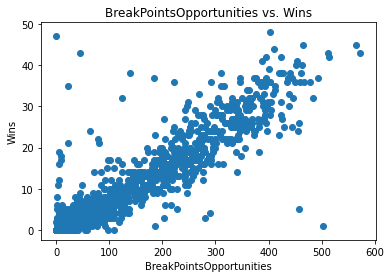

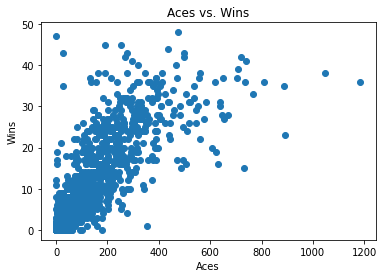

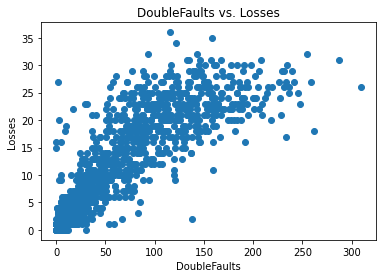

In [3]:
#@title Perform exploratory analysis
plt.clf()
plt.scatter(df['BreakPointsOpportunities'], df['Wins'])
plt.title("BreakPointsOpportunities vs. Wins")
plt.xlabel("BreakPointsOpportunities")
plt.ylabel("Wins")
plt.show()

plt.clf()
plt.scatter(df['Aces'], df['Wins'])
plt.title("Aces vs. Wins")
plt.xlabel("Aces")
plt.ylabel("Wins")
plt.show()

plt.clf()
plt.scatter(df['DoubleFaults'], df['Losses'])
plt.title("DoubleFaults vs. Losses")
plt.xlabel("DoubleFaults")
plt.ylabel("Losses")
plt.show()

# Single feature linear regressions
Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

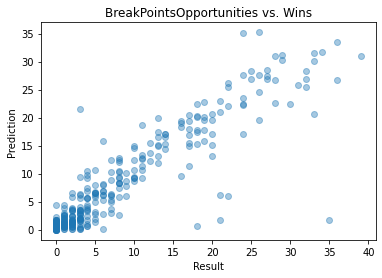

Train score:
0.8567936208639497
Test score:
0.831509951844679


In [4]:
#@title Perform single feature linear regressions

#BreakPointsOpportunities vs. Wins

#Note the double-square-brackets on the dataframe columns,
# helps avoid a formatting issue that would require .reshape()
x = df[['BreakPointsOpportunities']]
y = df[['Wins']]
x_train, x_test, y_train, y_test \
              = train_test_split(x, y, train_size=0.8, test_size=0.2)

line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)
line_fitter.score(x_test, y_test)

y_predicted = line_fitter.predict(x_test)


plt.scatter(y_test,y_predicted, alpha=0.4)
plt.title("BreakPointsOpportunities vs. Wins")
plt.ylabel("Prediction")
plt.xlabel("Result")
plt.show()

print("Train score:")
print(line_fitter.score(x_train, y_train))
print("Test score:")
print(line_fitter.score(x_test, y_test))

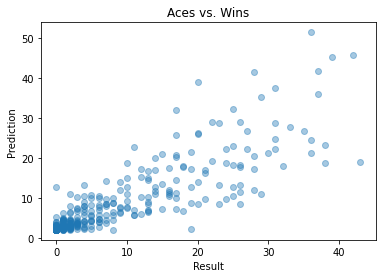

Train score:
0.6697184411131558
Test score:
0.7263378968857648


In [5]:
#Aces vs. Wins

x = df[['Aces']]
y = df[['Wins']]
x_train, x_test, y_train, y_test \
              = train_test_split(x, y, train_size=0.8, test_size=0.2)

line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)
line_fitter.score(x_test, y_test)

y_predicted = line_fitter.predict(x_test)


plt.scatter(y_test,y_predicted, alpha=0.4)
plt.title("Aces vs. Wins")
plt.ylabel("Prediction")
plt.xlabel("Result")
plt.show()

print("Train score:")
print(line_fitter.score(x_train, y_train))
print("Test score:")
print(line_fitter.score(x_test, y_test))

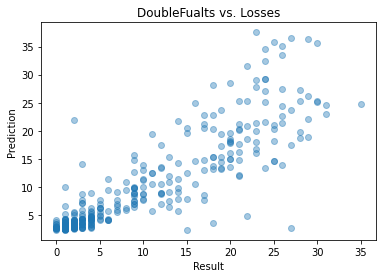

Train score:
0.7829222539973496
Test score:
0.7573316971394183


In [6]:
# DoubleFaults vs. Losses
x = df[['DoubleFaults']]
y = df[['Losses']]
x_train, x_test, y_train, y_test \
              = train_test_split(x, y, train_size=0.8, test_size=0.2)

line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)
line_fitter.score(x_test, y_test)

y_predicted = line_fitter.predict(x_test)


plt.scatter(y_test,y_predicted, alpha=0.4)
plt.title("DoubleFualts vs. Losses")
plt.ylabel("Prediction")
plt.xlabel("Result")

plt.show()

print("Train score:")
print(line_fitter.score(x_train, y_train))
print("Test score:")
print(line_fitter.score(x_test, y_test))

## Results
I did not test on "Winnings like was suggested, but tested on "Wins" in order to remove the monetary value from the equation.
As suggested "BreakPointsOpportunities vs. Wins" was the best test followed by "DoubleFualts vs. Losses" and "Aces vs. Wins". "Aces vs. Wins" scored less then 0.70 and is therefore not considerd valide.
1. BreakPointsOpportunities vs. Wins (0.83 on the test and 0.91 on the train)
2. DoubleFaults vs. Losses (0.77 on the test and 0.77 on the train)
3. Aces vs. Wins (0.69 on the test and 0.62 on the train)


#Two feature linear regression
Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

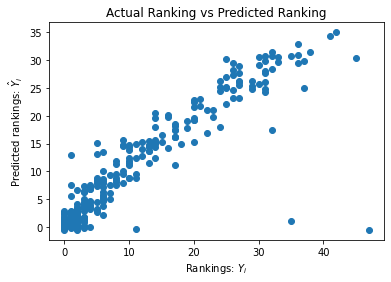

Train score:
0.868527078270694
Test score:
0.8498687116252366


In [7]:
#@title Perform two feature linear regressions

#ReturnGamesPlayed & ServiceGamesPlayed vs. Wins
x = df[['ReturnGamesPlayed', 'ServiceGamesPlayed']]
y = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()
model = lm.fit(x_train, y_train)
y_predict= lm.predict(x_test)

plt.scatter(y_test, y_predict)

plt.xlabel("Rankings: $Y_i$")
plt.ylabel("Predicted rankings: $\hat{Y}_i$")
plt.title("Actual Ranking vs Predicted Ranking")

plt.show()

print("Train score:")
print(lm.score(x_train, y_train))
print("Test score:")
print(lm.score(x_test, y_test))

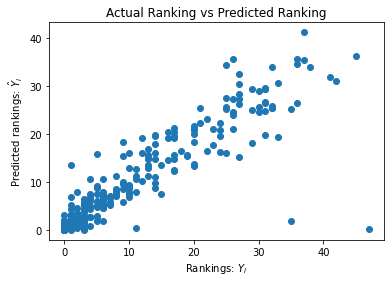

Train score:
0.8639783860809669
Test score:
0.8338321627479026


In [8]:
#BreakPointsFaced &BreakPointsOpportunities vs. Wins
x = df[['BreakPointsFaced', 'BreakPointsOpportunities']]
y = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)


lm = LinearRegression()
model = lm.fit(x_train, y_train)
y_predict= lm.predict(x_test)

plt.scatter(y_test, y_predict)

plt.xlabel("Rankings: $Y_i$")
plt.ylabel("Predicted rankings: $\hat{Y}_i$")
plt.title("Actual Ranking vs Predicted Ranking")

plt.show()

print("Train score:")
print(lm.score(x_train, y_train))
print("Test score:")
print(lm.score(x_test, y_test))

## Results
I rans two sets of tets to predict Wins:
1. ReturnGamesPlayed & ServiceGamesPlayed vs. Wins
and
2. BreakPointsFaced & BreakPointsOpportunities vs. Wins

Both sets of test scored similarly and scored well. The first set ReturnGamesPlayed and ServiceGamesPlayed is a somewhat obvious predictor of Wins since the more games you play, the more games you could win. You can't win if you don't play.

BreakPointsFaced & BreakPointsOpportunities vs. Wins is less obvious, but is quite similar to the previous test in my mind. You have to play in order to have break points. The more break points you win the more points you earn which are neeed to win.


#Multiple feature linear regressions
Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

Head to the Codecademy forums and share your set of features that resulted in the highest test score for predicting your outcome. What features are most important for being a successful tennis player?

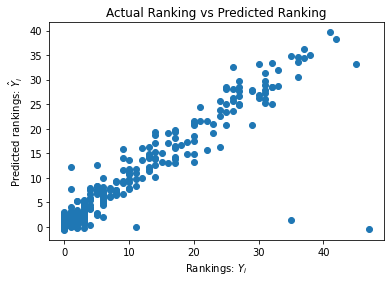

Train score:
0.8905313368911565
Test score:
0.8714059410727039


In [13]:
#@title Perform multiple feature linear regressions

x = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
y = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()
model = lm.fit(x_train, y_train)
y_predict= lm.predict(x_test)

plt.scatter(y_test, y_predict)

plt.xlabel("Rankings: $Y_i$")
plt.ylabel("Predicted rankings: $\hat{Y}_i$")
plt.title("Actual Ranking vs Predicted Ranking")

plt.show()

print("Train score:")
print(lm.score(x_train, y_train))
print("Test score:")
print(lm.score(x_test, y_test))

## Results
I used the indpendent criteria in the suggestion and then changed the dependent criteria from "Winnings" to "Wins".

The scores for both the training and test sets were satisfatory to indicate that these fields predict Wins.